In [103]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [61]:
# Corrected Boston Housing data by Bivand, Nowosad and Lovelace
# https://jakubnowosad.com/spData/reference/boston.html
dfo = pd.read_csv("boston_corrected.tsv", sep='\t', skiprows=9)

In [146]:
dfo.head(2)

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [63]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OBS.     506 non-null    int64  
 1   TOWN     506 non-null    object 
 2   TOWN#    506 non-null    int64  
 3   TRACT    506 non-null    int64  
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   MEDV     506 non-null    float64
 7   CMEDV    506 non-null    float64
 8   CRIM     506 non-null    float64
 9   ZN       506 non-null    float64
 10  INDUS    506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  NOX      506 non-null    float64
 13  RM       506 non-null    float64
 14  AGE      506 non-null    float64
 15  DIS      506 non-null    float64
 16  RAD      506 non-null    int64  
 17  TAX      506 non-null    int64  
 18  PTRATIO  506 non-null    float64
 19  B        506 non-null    float64
 20  LSTAT    506 non-null    float64
dtypes: float64(14), 

In [147]:
df = dfo.drop(['OBS.', 'LON', 'LAT', 'TRACT', 'TOWN', 'TOWN#', 'B', 'MEDV'], axis=1, inplace=False)

In [148]:
df.corr()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676


<Axes: >

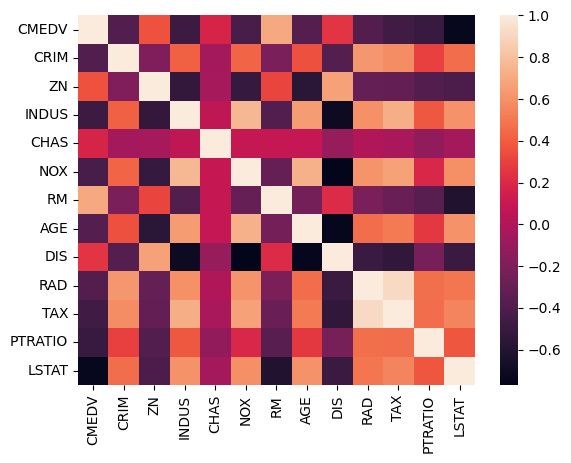

In [67]:
sns.heatmap(df.corr())

# Linear Regression

In [27]:
# CMEDV = corrected median house value
y = df.CMEDV
print(y.shape)
print(y[:3])

(506,)
0    24.0
1    21.6
2    34.7
Name: CMEDV, dtype: float64


In [26]:
X = np.array(df.RM).reshape(-1,1)
print(X.shape)
print(X[:3])

(506, 1)
[[6.575]
 [6.421]
 [7.185]]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: {}, X_test shape: {}, y_train shape: {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape: (404, 1), X_test shape: (102, 1), y_train shape: (404,), y_test shape (102,)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test).reshape(-1,1)
print(y_pred.shape)
y_pred[:3]

(102, 1)


array([[23.73724121],
       [26.93319965],
       [19.69089617]])

In [30]:
print(model.coef_)
print(model.intercept_)

[9.34490772]
-36.21968671198455


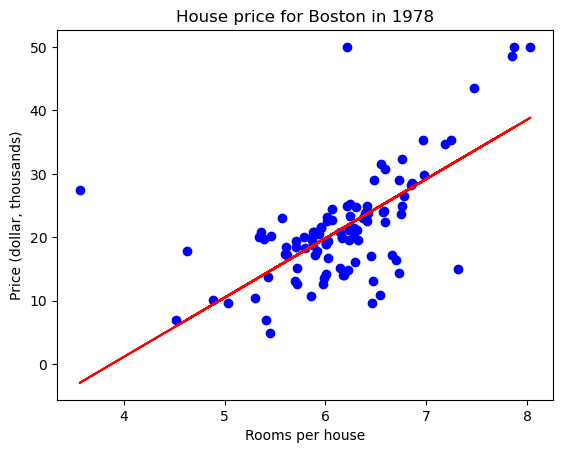

In [43]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("House price for Boston in 1978")
plt.xlabel("Rooms per house")
plt.ylabel("Price (dollar, thousands)")
plt.show()

# Multiple variables

In [46]:
# CRIM = crime rate; LSTAT = working class; NOX = air quality; PTRATIO = pupil:teacher ratio; DIS = distance to employment centres; RAD = radial road proximity; RM = rooms
X = df[['ZN', 'CRIM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM']]
print(X.shape)
print(X[:3])

(506, 7)


,CRIM,DIS,LSTAT,NOX,PTRATIO,RAD,RM
0,0.00632,4.0900,4.98,0.538,15.3,1,6.575
1,0.02731,4.9671,9.14,0.469,17.8,2,6.421
2,0.02729,4.9671,4.03,0.469,17.8,2,7.185


# Logistic Regression

In [149]:
# CHAS = whether land area is beside the Charles River
df = dfo.drop(['OBS.', 'LON', 'LAT', 'TRACT', 'TOWN', 'TOWN#', 'B', 'MEDV'], axis=1, inplace=False)
df.CHAS.unique()

array([0, 1])

In [150]:
y = df.CHAS
print(type(y))
y.shape

<class 'pandas.core.series.Series'>


(506,)

In [152]:
# check if target classes balanced
print(y.value_counts())
print("%.4f" % (y.value_counts()[0] / len(y)))

CHAS
0    471
1     35
Name: count, dtype: int64
0.931


In [117]:
X = df.drop('CHAS', axis=1)
X.shape

(506, 12)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: {}, X_test shape: {}, y_train shape: {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape: (404, 12), X_test shape: (102, 12), y_train shape: (404,), y_test shape (102,)


In [119]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [120]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [121]:
# use the scaling generated by Training data
X_test_scaled = scaler.transform(X_test)

In [122]:
y_test_pred = model.predict(X_test_scaled)
print(type(y_test_pred))
print(y_test_pred.shape)

<class 'numpy.ndarray'>
(102,)


In [157]:
print("%.4f" % log_loss(y_test, y_test_pred))

2.120


In [154]:
type(model.coef_[0])

numpy.ndarray

In [159]:
print(model.coef_)
print(model.intercept_)

[[0.5924 -0.8826 0.1439 0.5430 0.5592 0.0007 0.0248 -0.1627 0.8691
  -0.7506 -0.1335 -0.1397]]
[-3.0615]


In [164]:
# inputs can differ in type i.e. one a np.array, other a Series
print("%.4f" % accuracy_score(y_test, y_test_pred))

0.9412


In [139]:
confusion_matrix(y_test, y_test_pred)
# fails to predict any positives!

array([[96,  0],
       [ 6,  0]])

# Iris data for Logistic regression

In [184]:
df = pd.read_csv("../datasets/iris/Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [185]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}, inplace=True)

In [186]:

y = df.Species
print(y.shape)

(150,)


In [187]:
X = df.drop('Species', axis=1)
print(X.shape)

(150, 5)


In [ ]:
# too few data to split as train and test

In [188]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [189]:
model = LogisticRegression()
model.fit(X_scaled, y)

LogisticRegression()

In [190]:
print(y.value_counts())

Species
0    50
1    50
2    50
Name: count, dtype: int64


In [191]:
y_pred = model.predict(X_scaled)
print(y_pred.shape)

(150,)


In [192]:
print(model.coef_)
print(model.intercept_)

[[-1.2541 -0.9443 0.9646 -1.5978 -1.4908]
 [-0.9810 0.4025 -0.4228 0.1458 -0.3191]
 [2.2350 0.5418 -0.5418 1.4520 1.8099]]
[-0.2802 2.1681 -1.8879]


In [193]:
print("%.2f" % accuracy_score(y, y_pred))

1.00


In [194]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [ ]:
# too good, will try splitting train/test

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape: {}, X_test shape: {}, y_train shape: {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape: (105, 5), X_test shape: (45, 5), y_train shape: (105,), y_test shape (45,)


In [196]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [197]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [198]:
# use the scaling generated by Training data
X_test_scaled = scaler.transform(X_test)

In [208]:
y_test_prob = model.predict_proba(X_test_scaled)
print(y_test_prob.shape)

(45, 3)


In [209]:
print("%.4f" % log_loss(y_test, y_test_prob))

0.0517


In [212]:
y_test_pred = model.predict(X_test_scaled)

In [213]:
y_test_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [210]:
print(model.coef_)
print(model.intercept_)

[[-1.1780 -0.8484 0.8546 -1.4601 -1.3358]
 [-0.8514 0.3375 -0.4047 0.1323 -0.3144]
 [2.0294 0.5109 -0.4499 1.3278 1.6502]]
[-0.6414 1.9789 -1.3374]


In [214]:
# inputs can differ in type i.e. one a np.array, other a Series
print("%.4f" % accuracy_score(y_test, y_test_pred))

1.0000


In [215]:
confusion_matrix(y_test, y_test_pred)
# fails to predict any positives!

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])